# SI 618: Data Manipulation and Analysis
## 07 Beyond regex: Natural Language Processing 
### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.</small>
    
### Please ensure you have this version:
Version 2024.02.20.1.CT


# Updates
* project team formation

In [88]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# spaCy

- Fast, and extensible NLP package for Python
- <https://spacy.io/>
- NOTE: You will need to install this, and then (one time only as well) download the English corpus.

In [89]:
import spacy

In [90]:
# NOTE: You should have already installed the following language model
#       when you created your .venv virtual environment.  It is included
#       in case you need to install it again, in which case you can uncomment
#       the following line and run it.
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 10.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [91]:
# loading up the language model: English
# note that Windows users might need to figure out where
# the previous cell installed the library and change the following line accordingly
nlp = spacy.load('en_core_web_sm')

In [92]:
# from Make It Stick: The Science of Successful Learning

# making sure use UTF-8 encoding to handle the special characters
# stopwords need to removed
# punctuation needs to be removed

sentences = """Michael Young is a high-achieving fourth-year medical
student at Georgia Regents University who pulled himself up from rock
bottom by changing the way he studies. Young entered medical school
without the usual foundation of premed coursework. His classmates all had
backgrounds in biochemistry, pharmacology, and the like. Medical
school is plenty tough under any circumstances, but in Young's
case even more so for lack of a footing."""

In [93]:
print(sentences)

Michael Young is a high-achieving fourth-year medical
student at Georgia Regents University who pulled himself up from rock
bottom by changing the way he studies. Young entered medical school
without the usual foundation of premed coursework. His classmates all had
backgrounds in biochemistry, pharmacology, and the like. Medical
school is plenty tough under any circumstances, but in Young's
case even more so for lack of a footing.


In [94]:
sentences

"Michael Young is a high-achieving fourth-year medical\nstudent at Georgia Regents University who pulled himself up from rock\nbottom by changing the way he studies. Young entered medical school\nwithout the usual foundation of premed coursework. His classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. Medical\nschool is plenty tough under any circumstances, but in Young's\ncase even more so for lack of a footing."

### Goal: calculate the frequency of each word
- See which words are more frequent
- Generate a meaningful summary for the above paragraph?

#### Normalizing the text by lowering the case

In [95]:
type(sentences)

str

In [96]:
sentences_lower = sentences.lower()
sentences_lower

"michael young is a high-achieving fourth-year medical\nstudent at georgia regents university who pulled himself up from rock\nbottom by changing the way he studies. young entered medical school\nwithout the usual foundation of premed coursework. his classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. medical\nschool is plenty tough under any circumstances, but in young's\ncase even more so for lack of a footing."

## 0-2. remove punctuation and special characters

#### Exclude special characters one by one

#### Alternatively, we can use regular expression to remove punctuations
- So we don't have to list up all possible special characters that we want to remove
- https://docs.python.org/3.4/library/re.html
- https://en.wikipedia.org/wiki/Regular_expression

In [97]:
sentences_lower_no_punctuation = re.sub(r'[^\w\s]+', ' ', sentences_lower)
sentences_lower_no_punctuation

'michael young is a high achieving fourth year medical\nstudent at georgia regents university who pulled himself up from rock\nbottom by changing the way he studies  young entered medical school\nwithout the usual foundation of premed coursework  his classmates all had\nbackgrounds in biochemistry  pharmacology  and the like  medical\nschool is plenty tough under any circumstances  but in young s\ncase even more so for lack of a footing '

### And one more way...

Regular expressions:

^ means "beginning of string" 
UNLESS it's in [ ], in which case it means "not"

r'^The' # means The at the beginning of a string
r'^[The]' # means any one of T or h or e at the beginning of a string
t'^[^The]' # means any character other than T,h,or e at the beginning

In [98]:
# remove punctuation and special characters from the sentences_lower string
sentences_lower_no_punctuation = re.sub(r'[^\w\s]+', ' ', sentences_lower)
sentences_lower_no_punctuation


'michael young is a high achieving fourth year medical\nstudent at georgia regents university who pulled himself up from rock\nbottom by changing the way he studies  young entered medical school\nwithout the usual foundation of premed coursework  his classmates all had\nbackgrounds in biochemistry  pharmacology  and the like  medical\nschool is plenty tough under any circumstances  but in young s\ncase even more so for lack of a footing '

And still one more way:

In [99]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
# remove punctuation and special characters from the sentences_lower string using maketrans:
sentences_lower_no_punctuation = sentences_lower.translate(
    str.maketrans('', '', string.punctuation))

Remember our task at hand: determining the frequency of each word in a document.

- Split the paragraph into a list of words

In [101]:
words = sentences_lower_no_punctuation.split()

In [102]:
words[:10]

['michael',
 'young',
 'is',
 'a',
 'highachieving',
 'fourthyear',
 'medical',
 'student',
 'at',
 'georgia']

- Count the words from the list
- Words that can occur in any kind of paragraphs...?

In [103]:
d = {}
for word in words:
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1
d

{'michael': 1,
 'young': 2,
 'is': 2,
 'a': 2,
 'highachieving': 1,
 'fourthyear': 1,
 'medical': 3,
 'student': 1,
 'at': 1,
 'georgia': 1,
 'regents': 1,
 'university': 1,
 'who': 1,
 'pulled': 1,
 'himself': 1,
 'up': 1,
 'from': 1,
 'rock': 1,
 'bottom': 1,
 'by': 1,
 'changing': 1,
 'the': 3,
 'way': 1,
 'he': 1,
 'studies': 1,
 'entered': 1,
 'school': 2,
 'without': 1,
 'usual': 1,
 'foundation': 1,
 'of': 2,
 'premed': 1,
 'coursework': 1,
 'his': 1,
 'classmates': 1,
 'all': 1,
 'had': 1,
 'backgrounds': 1,
 'in': 2,
 'biochemistry': 1,
 'pharmacology': 1,
 'and': 1,
 'like': 1,
 'plenty': 1,
 'tough': 1,
 'under': 1,
 'any': 1,
 'circumstances': 1,
 'but': 1,
 'youngs': 1,
 'case': 1,
 'even': 1,
 'more': 1,
 'so': 1,
 'for': 1,
 'lack': 1,
 'footing': 1}

In [104]:
from collections import defaultdict
d = defaultdict(int)
for word in words:
    d[word] += 1

In [105]:
from collections import Counter

give the words frequence (Counter)

In [106]:
Counter(words).most_common(20)

[('medical', 3),
 ('the', 3),
 ('young', 2),
 ('is', 2),
 ('a', 2),
 ('school', 2),
 ('of', 2),
 ('in', 2),
 ('michael', 1),
 ('highachieving', 1),
 ('fourthyear', 1),
 ('student', 1),
 ('at', 1),
 ('georgia', 1),
 ('regents', 1),
 ('university', 1),
 ('who', 1),
 ('pulled', 1),
 ('himself', 1),
 ('up', 1)]

/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_21760/677599390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=words, order=pd.Series(words).value_counts().index, palette='husl')


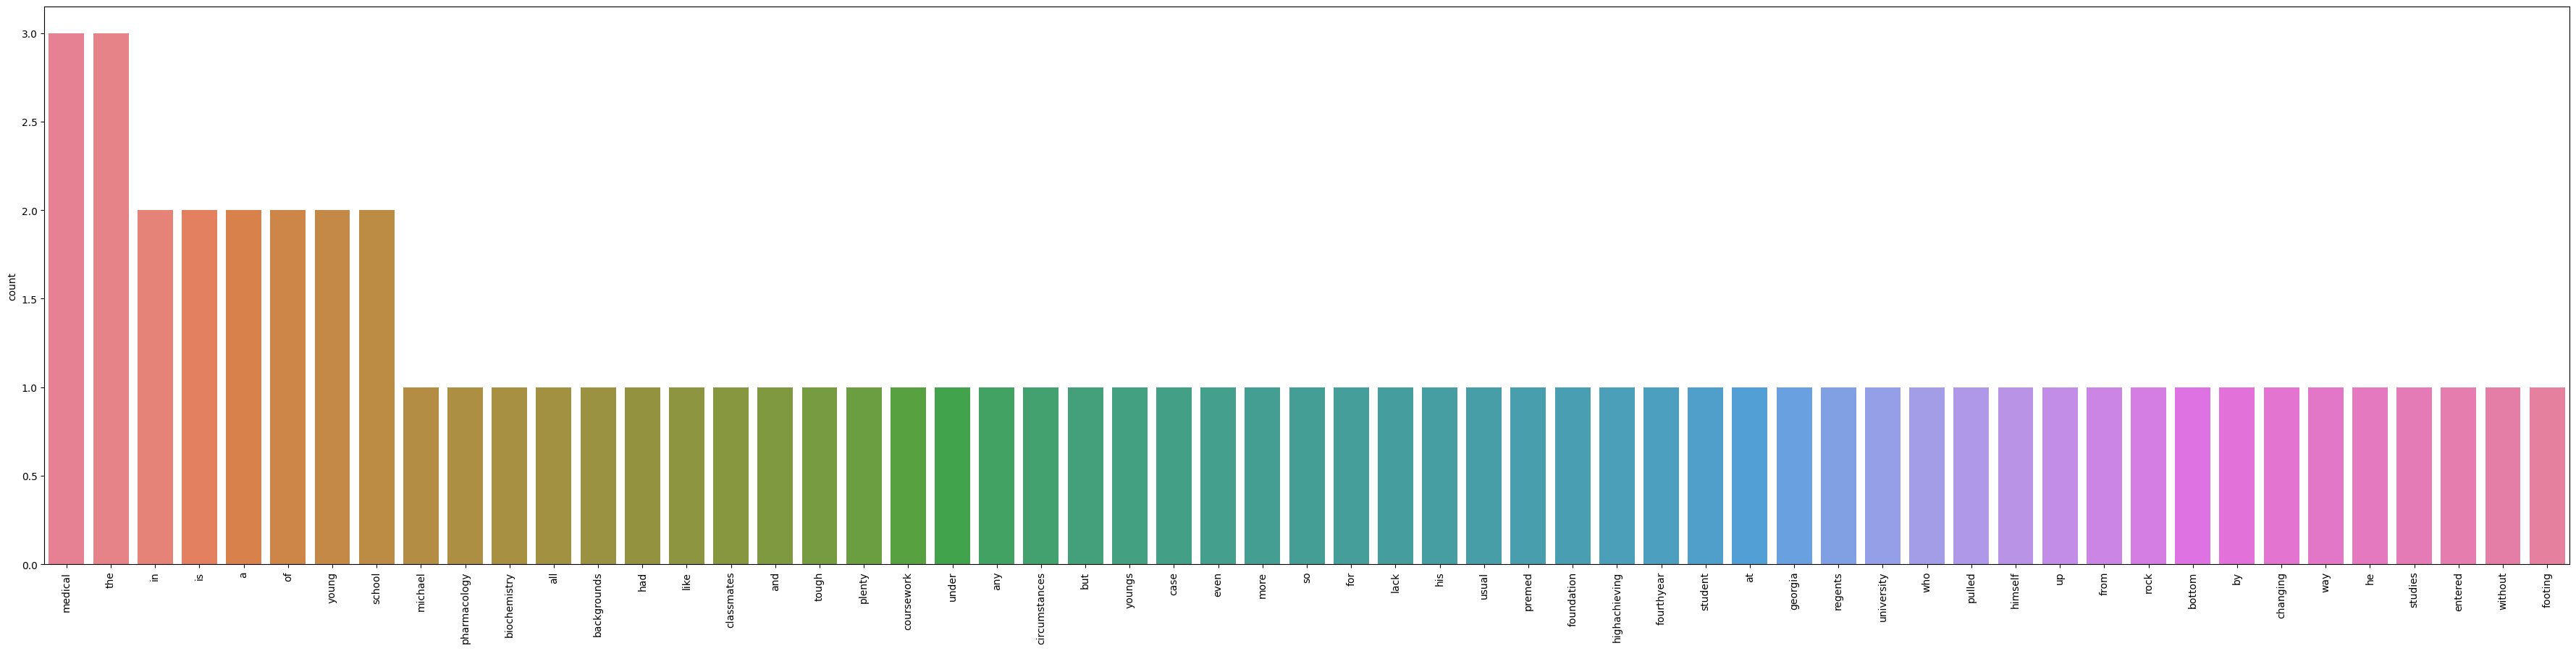

In [107]:
plt.figure(figsize=(45,10))
sns.countplot(x=words, order=pd.Series(words).value_counts().index, palette='husl')
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

## 0-3. Remove stop words

- Stop words usually refers to the most common words in a language
    - No single universal stopwords
    - Often stopwords are removed to improve the performance of NLP models
    - https://en.wikipedia.org/wiki/Stop_words
    - https://en.wikipedia.org/wiki/Most_common_words_in_English

#### Import the list of stop words from ```spaCy```

In [108]:
from spacy.lang.en.stop_words import STOP_WORDS

In [109]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

#### Goal: We are going to count the frequency of each word from the paragraph, to see which words can be used to represent the paragraph's content. 

- Note that our paragraph is stored as a single string object...

#### When we removed stopwords:

In [110]:
words_no_stopwords = list()
for word in words:
    if word not in STOP_WORDS:
        words_no_stopwords.append(word)

### <font color="magenta"> Q1: Re-implement the code in the previous cell using a list comprehension</font>

In [111]:
words_no_stopwords = [word for word in words if word not in STOP_WORDS]

### <font color="magenta">Q2: Use a `Counter` to find the frequencies of each word in the `words_nostop` list.</font>

In [112]:
Counter(words_no_stopwords)

Counter({'medical': 3,
         'young': 2,
         'school': 2,
         'michael': 1,
         'highachieving': 1,
         'fourthyear': 1,
         'student': 1,
         'georgia': 1,
         'regents': 1,
         'university': 1,
         'pulled': 1,
         'rock': 1,
         'changing': 1,
         'way': 1,
         'studies': 1,
         'entered': 1,
         'usual': 1,
         'foundation': 1,
         'premed': 1,
         'coursework': 1,
         'classmates': 1,
         'backgrounds': 1,
         'biochemistry': 1,
         'pharmacology': 1,
         'like': 1,
         'plenty': 1,
         'tough': 1,
         'circumstances': 1,
         'youngs': 1,
         'case': 1,
         'lack': 1,
         'footing': 1})

### <font color="magenta">Q3: Create a bar chart showing the frequencies of the 10 most common words, alphabetically sorted.</font>

/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_21760/1166924618.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=words_no_stopwords, order=pd.Series(words_no_stopwords).head(10).value_counts().index, palette='husl')


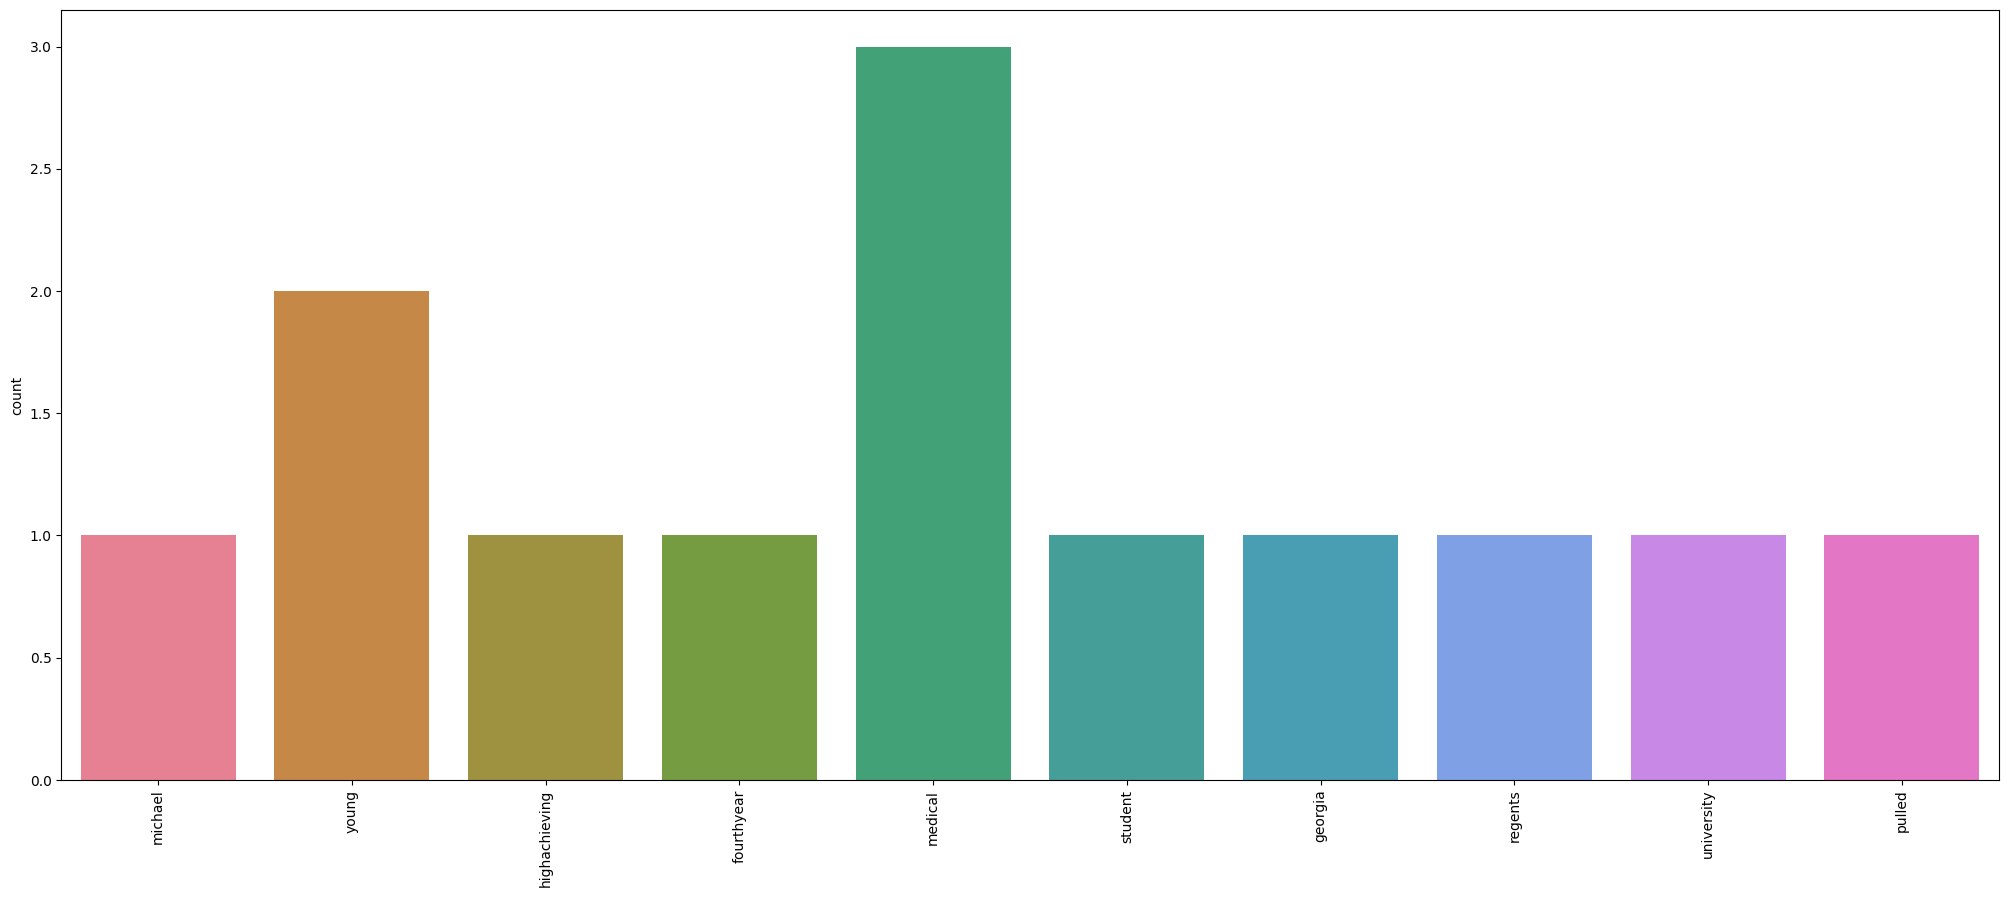

In [113]:
# insert your code here
c = Counter(words_no_stopwords).most_common(10) # tuple

plt.figure(figsize=(25,10))
sns.countplot(x=words_no_stopwords, order=pd.Series(words_no_stopwords).head(10).value_counts().index, palette='husl')
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

In [114]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


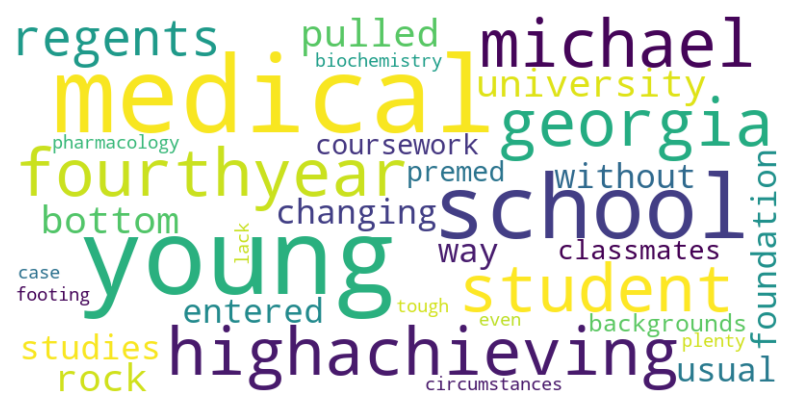

In [115]:
# use worldcloud to visualize the most common words
from wordcloud import WordCloud
# wordcloud2 = WordCloud().generate(sentences_lower_no_punctuation)
wordcloud2 = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(sentences_lower_no_punctuation)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis('off')
plt.show()

# 1. Extracting linguistic features from spaCy

## 1-1. Tokenize
- Token: a semantic unit for analysis
    - (Loosely) equal term for word
        - ```sent_low_pnct.split()```
    - Tricky cases
        - aren't $\rightarrow$ ![](https://nlp.stanford.edu/IR-book/html/htmledition/img88.png) ![](https://nlp.stanford.edu/IR-book/html/htmledition/img89.png) ? ![](https://nlp.stanford.edu/IR-book/html/htmledition/img86.png) ?
        - O'Neil $\rightarrow$ ![](https://nlp.stanford.edu/IR-book/html/htmledition/img83.png) ? ![](https://nlp.stanford.edu/IR-book/html/htmledition/img84.png) ![](https://nlp.stanford.edu/IR-book/html/htmledition/img81.png) ?
        - https://nlp.stanford.edu/IR-book/html/htmledition/tokenization-1.html
- In ```spaCy```:
    - Many token types, like word, punctuation symbol, whitespace, etc.

### Let's dissect the sentence!

- initializing the ```spaCy``` object 

In [116]:
!pip install contractions


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [117]:
sentence_contraction = "I'm not going to go."

In [118]:
import contractions
expanded_text = []
for word in sentence_contraction.split():
    expanded_text.append(contractions.fix(word))

expanded_text = ' '.join(expanded_text)
print(sentence_contraction)
print(expanded_text)

I'm not going to go.
I am not going to go.


In [119]:
# examples partially taken from (now defunct) https://nlpforhackers.io/complete-guide-to-spacy/
import spacy
nlp = spacy.load('en_core_web_sm')

In [120]:
type(nlp)

spacy.lang.en.English

- Our sentence: "Hello World!"
    - Pass the sentence string to the ```spaCy``` object ```nlp```

In [121]:
doc = nlp("Hello World!")

- The sentence is considered as a short document.

In [122]:
print(type(doc), doc)

<class 'spacy.tokens.doc.Doc'> Hello World!


- As importing the sentence string above, ```spaCy``` split the sentence into tokens (tokenization!)

In [123]:
for i,token in enumerate(doc):
    print(i, token)

0 Hello
1 World
2 !


- With index information (location from the sentence) of each token

| 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11|
|---|---|---|---|---|---|---|---|---|---|---|---|
| H | e | l | l | o | _ | W | o | r | l | d | ! |

In [124]:
for i, token in enumerate(doc):
    print(i, token.text, token.idx)


0 Hello 0
1 World 6
2 ! 11


- And many more!
    - https://spacy.io/api/token#attributes

In [125]:
sentences

"Michael Young is a high-achieving fourth-year medical\nstudent at Georgia Regents University who pulled himself up from rock\nbottom by changing the way he studies. Young entered medical school\nwithout the usual foundation of premed coursework. His classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. Medical\nschool is plenty tough under any circumstances, but in Young's\ncase even more so for lack of a footing."

In [126]:
doc = nlp(sentences)
type(doc)
doc

Michael Young is a high-achieving fourth-year medical
student at Georgia Regents University who pulled himself up from rock
bottom by changing the way he studies. Young entered medical school
without the usual foundation of premed coursework. His classmates all had
backgrounds in biochemistry, pharmacology, and the like. Medical
school is plenty tough under any circumstances, but in Young's
case even more so for lack of a footing.

In [127]:


print("text\tidx\tlemma\tlower\tpunct\tspace\tshape\tPOS")
for token in doc:
    if token.is_space:
        print("SPACE")
    else:
        print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
            token.text,
            token.idx,
            token.lemma_,
            token.lower_,
            token.is_punct,
            token.is_space,
            token.shape_,
            token.pos_
    ))

text	idx	lemma	lower	punct	space	shape	POS
Michael	0	Michael	michael	False	False	Xxxxx	PROPN
Young	8	Young	young	False	False	Xxxxx	PROPN
is	14	be	is	False	False	xx	AUX
a	17	a	a	False	False	x	DET
high	19	high	high	False	False	xxxx	ADV
-	23	-	-	True	False	-	PUNCT
achieving	24	achieve	achieving	False	False	xxxx	VERB
fourth	34	fourth	fourth	False	False	xxxx	ADJ
-	40	-	-	True	False	-	PUNCT
year	41	year	year	False	False	xxxx	NOUN
medical	46	medical	medical	False	False	xxxx	ADJ
SPACE
student	54	student	student	False	False	xxxx	NOUN
at	62	at	at	False	False	xx	ADP
Georgia	65	Georgia	georgia	False	False	Xxxxx	PROPN
Regents	73	Regents	regents	False	False	Xxxxx	PROPN
University	81	University	university	False	False	Xxxxx	PROPN
who	92	who	who	False	False	xxx	PRON
pulled	96	pull	pulled	False	False	xxxx	VERB
himself	103	himself	himself	False	False	xxxx	PRON
up	111	up	up	False	False	xx	ADP
from	114	from	from	False	False	xxxx	ADP
rock	119	rock	rock	False	False	xxxx	NOUN
SPACE
bottom	124	bottom	bottom	Fa

In [128]:
doc = nlp(sentences)

print("text\tidx\tlemma\tlower\tpunct\tspace\tstop\tshape\tPOS")
for token in doc:
    if token.is_space:
        print("SPACE")
    else:
        print("{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(
            token.text,
            token.idx,
            token.lemma_,
            token.lower_,
            token.is_punct,
            token.is_space,
            token.is_stop,
            token.shape_,
            token.pos_
    ))


text	idx	lemma	lower	punct	space	stop	shape	POS
Michael	0	Michael	michael	False	False	False	Xxxxx
Young	8	Young	young	False	False	False	Xxxxx
is	14	be	is	False	False	True	xx
a	17	a	a	False	False	True	x
high	19	high	high	False	False	False	xxxx
-	23	-	-	True	False	False	-
achieving	24	achieve	achieving	False	False	False	xxxx
fourth	34	fourth	fourth	False	False	False	xxxx
-	40	-	-	True	False	False	-
year	41	year	year	False	False	False	xxxx
medical	46	medical	medical	False	False	False	xxxx
SPACE
student	54	student	student	False	False	False	xxxx
at	62	at	at	False	False	True	xx
Georgia	65	Georgia	georgia	False	False	False	Xxxxx
Regents	73	Regents	regents	False	False	False	Xxxxx
University	81	University	university	False	False	False	Xxxxx
who	92	who	who	False	False	True	xxx
pulled	96	pull	pulled	False	False	False	xxxx
himself	103	himself	himself	False	False	True	xxxx
up	111	up	up	False	False	True	xx
from	114	from	from	False	False	True	xxxx
rock	119	rock	rock	False	False	False	xxxx
SPACE
bottom

#### <font color="Magenta">Qx:</font>
Create a bar chart, similar to the previous one, that uses the output from the spacy tokenizer.  You should exclude punctuation, spaces and stopwords.

In [129]:
# Create a bar chart, similar to the previous one, that uses the output from the spacy tokenizer.  You should exclude punctuation, spaces and stopwords.

doc = nlp(sentences)
words = [token.text for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
words


['Michael',
 'Young',
 'high',
 'achieving',
 'fourth',
 'year',
 'medical',
 'student',
 'Georgia',
 'Regents',
 'University',
 'pulled',
 'rock',
 'changing',
 'way',
 'studies',
 'Young',
 'entered',
 'medical',
 'school',
 'usual',
 'foundation',
 'premed',
 'coursework',
 'classmates',
 'backgrounds',
 'biochemistry',
 'pharmacology',
 'like',
 'Medical',
 'school',
 'plenty',
 'tough',
 'circumstances',
 'Young',
 'case',
 'lack',
 'footing']

/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_21760/463851499.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=words, order=pd.Series(words).value_counts().index, palette='husl')


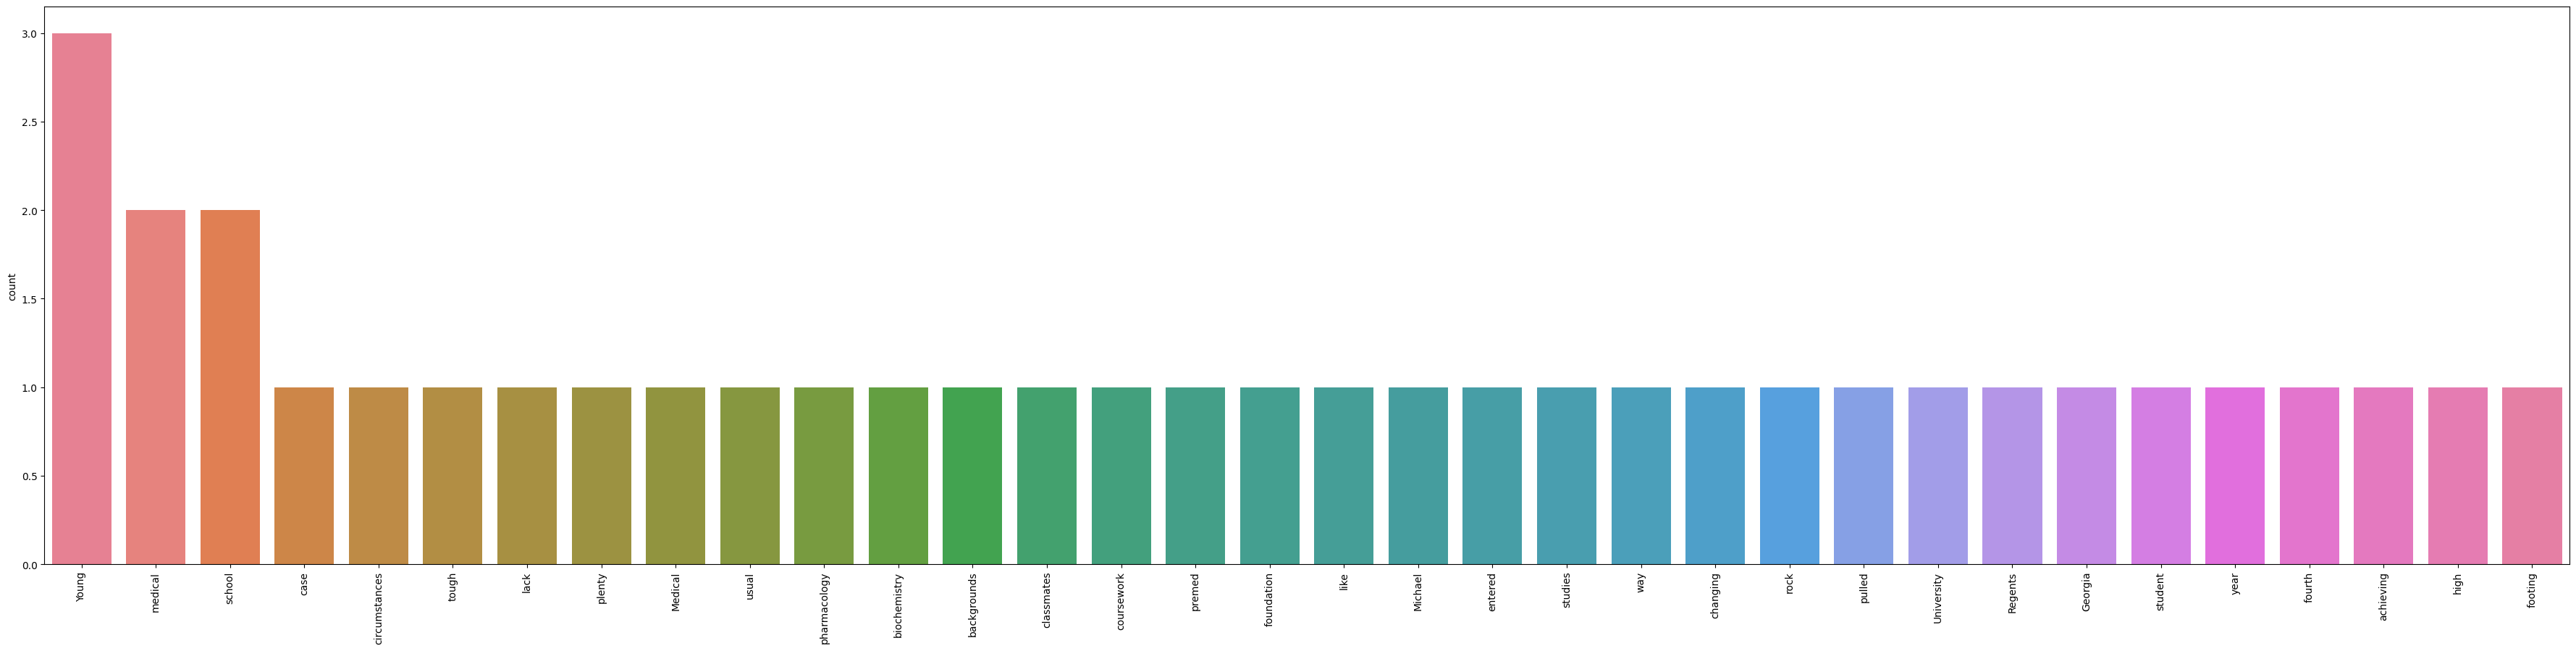

In [130]:
# SOLUTION: delete

# Create a bar chart, similar to the previous one, that uses the output from the spacy tokenizer.  You should exclude punctuation, spaces and stopwords.
doc = nlp(sentences)
words = [token.text for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
plt.figure(figsize=(45,10))
sns.countplot(x=words, order=pd.Series(words).value_counts().index, palette='husl')
plt.xticks(rotation=90)
plt.show()

## 1-2. Sentence detection

- For the document with multiple sentences, we would need to separate  each sentence.
- In ```spaCy```, the job is more convenient (and would cause less mistakes) than using regular expression

In [131]:
sentences

"Michael Young is a high-achieving fourth-year medical\nstudent at Georgia Regents University who pulled himself up from rock\nbottom by changing the way he studies. Young entered medical school\nwithout the usual foundation of premed coursework. His classmates all had\nbackgrounds in biochemistry, pharmacology, and the like. Medical\nschool is plenty tough under any circumstances, but in Young's\ncase even more so for lack of a footing."

In [132]:
# same document, but initiate as the spaCy object...
doc = nlp(sentences)

- Sentences are stored as a generator object
    - Instead of storing sentences as a list, each sentence is stored as a item in the generator object 
    - Iteratable (i.e., can be used in a for loop)
    - More efficient memory use
    - https://wiki.python.org/moin/Generators

In [133]:
doc.sents

- Printing sentences with the index number

In [134]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 Michael Young is a high-achieving fourth-year medical
student at Georgia Regents University who pulled himself up from rock
bottom by changing the way he studies.
1 Young entered medical school
without the usual foundation of premed coursework.
2 His classmates all had
backgrounds in biochemistry, pharmacology, and the like.
3 Medical
school is plenty tough under any circumstances, but in Young's
case even more so for lack of a footing.


## 1-3. Part-of-speech (POS) tagging

- I want to find words with particular part-of-speech!
- Different part-of-speech words carry different information
    - e.g., noun (subject), verb (action term), adjective (quality of the object) 
- https://spacy.io/usage/linguistic-features#pos-tagging

- Yelp review!

In [135]:
# from https://www.yelp.com/biz/ajishin-novi?hrid=juA4Zn2TX7845vNFn4syBQ&utm_campaign=www_review_share_popup&utm_medium=copy_link&utm_source=(direct)
doc = nlp("""One of the best Japanese restaurants in Novi. Simple food, great taste, amazingly price. I visit this place a least twice month.""")

- multiple sentences exist in a document

In [136]:
for i, sent in enumerate(doc.sents):
    print(i, sent)

0 One of the best Japanese restaurants in Novi.
1 Simple food, great taste, amazingly price.
2 I visit this place a least twice month.


- Question: which words are adjectives (ADJ)?

In [137]:
for i, sent in enumerate(doc.sents):
    for token in sent:
        if token.pos_ == 'ADJ':
            print(token.text, "\t", token.pos_)

best 	 ADJ
Japanese 	 ADJ
Simple 	 ADJ
great 	 ADJ
least 	 ADJ
twice 	 ADJ


## Named Entity Recognition

In [138]:
doc = nlp(sentences)
print([(X.text, X.label_) for X in doc.ents])

[('Michael Young', 'PERSON'), ('fourth-year', 'DATE'), ('Georgia Regents University', 'ORG'), ('Young', 'PERSON')]


In [139]:
url = 'https://fivethirtyeight.com/features/remembering-alex-trebek-the-man-with-all-the-answers/'

In [140]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html)
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string(url)
article = nlp(ny_bb)
len(article.ents)

106

In [141]:
article

 Remembering Alex Trebek, The Man With All The Answers | FiveThirtyEight Skip to main content FiveThirtyEight Search Search ABC News Menu Remembering Alex Trebek, The Man With All The Answers Share on Facebook Share on Twitter Politics Sports Science Podcasts Video Interactives ABC News   This is an archived site and is no longer being updated. New 538 articles can be found at www.abcnews.com/538.   Nov. 9, 2020, at 4:09 PM Remembering Alex Trebek, The Man With All The Answers By Oliver Roeder Filed under Jeopardy!     PHOTO ILLUSTRATION BY FIVETHIRTYEIGHT / GETTY IMAGES For decades, I’ve tuned into the trivia game show “Jeopardy!” for the facts. On Sunday, the show lost its judicious leader, Alex Trebek, who died at age 80 after a battle with cancer. Trebek had hosted “Jeopardy!” for my entire life. He began in 1984 and hosted every episode since — save for April Fool’s Day in 1997 when he and Pat Sajak of “Wheel of Fortune” swapped places — more than 8,000 half-hour shows in all. For

In [142]:
labels = [(x.label_,x.text) for x in article.ents]
Counter(labels)

Counter({('PERSON', 'Trebek'): 14,
         ('WORK_OF_ART', 'Jeopardy'): 7,
         ('PERSON', 'Alex Trebek'): 5,
         ('WORK_OF_ART', 'The Man With All The Answers'): 2,
         ('DATE', '1984'): 2,
         ('PERSON', 'Alex'): 2,
         ('DATE', '2024'): 2,
         ('ORG', 'ABC News Internet Ventures'): 2,
         ('ORG', 'ABC News'): 1,
         ('WORK_OF_ART',
          'The Man With All The Answers Share on Facebook Share on Twitter Politics Sports Science Podcasts Video Interactives ABC News'): 1,
         ('CARDINAL', '538'): 1,
         ('DATE', 'Nov. 9, 2020'): 1,
         ('TIME', '4:09 PM'): 1,
         ('PERSON', 'Oliver Roeder Filed'): 1,
         ('ORG', 'Jeopardy'): 1,
         ('PERSON', 'FIVETHIRTYEIGHT'): 1,
         ('DATE', 'decades'): 1,
         ('DATE', 'Sunday'): 1,
         ('DATE', 'age 80'): 1,
         ('DATE', 'April Fool’s Day'): 1,
         ('DATE', '1997'): 1,
         ('PERSON', 'Pat Sajak'): 1,
         ('WORK_OF_ART', 'Wheel of Fortune'): 1,

In [143]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 42,
         'DATE': 18,
         'WORK_OF_ART': 14,
         'ORG': 9,
         'CARDINAL': 8,
         'GPE': 4,
         'NORP': 4,
         'TIME': 2,
         'LOC': 1,
         'FAC': 1,
         'LANGUAGE': 1,
         'EVENT': 1,
         'PRODUCT': 1})

In [144]:
labels

['PERSON',
 'WORK_OF_ART',
 'ORG',
 'PERSON',
 'WORK_OF_ART',
 'CARDINAL',
 'DATE',
 'TIME',
 'PERSON',
 'WORK_OF_ART',
 'PERSON',
 'ORG',
 'PERSON',
 'DATE',
 'WORK_OF_ART',
 'DATE',
 'PERSON',
 'DATE',
 'PERSON',
 'WORK_OF_ART',
 'DATE',
 'DATE',
 'DATE',
 'PERSON',
 'WORK_OF_ART',
 'CARDINAL',
 'TIME',
 'PERSON',
 'DATE',
 'CARDINAL',
 'PERSON',
 'WORK_OF_ART',
 'DATE',
 'PERSON',
 'PERSON',
 'PERSON',
 'GPE',
 'NORP',
 'NORP',
 'PERSON',
 'LOC',
 'WORK_OF_ART',
 'PERSON',
 'ORG',
 'NORP',
 'DATE',
 'DATE',
 'CARDINAL',
 'DATE',
 'PERSON',
 'PERSON',
 'WORK_OF_ART',
 'DATE',
 'PERSON',
 'DATE',
 'GPE',
 'GPE',
 'WORK_OF_ART',
 'PERSON',
 'WORK_OF_ART',
 'NORP',
 'PERSON',
 'WORK_OF_ART',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'FAC',
 'PERSON',
 'LANGUAGE',
 'EVENT',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'CARDINAL',
 'ORG',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'PERSON',
 'CARDINAL',
 'PERSON',
 'DATE',
 'CARDINAL',
 'DATE',
 'PERSON',
 'WORK

/var/folders/25/11_3tsc15qdghq5pm9g0v2wm0000gn/T/ipykernel_21760/2463822336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, order=pd.Series(labels).value_counts().index, palette='husl')


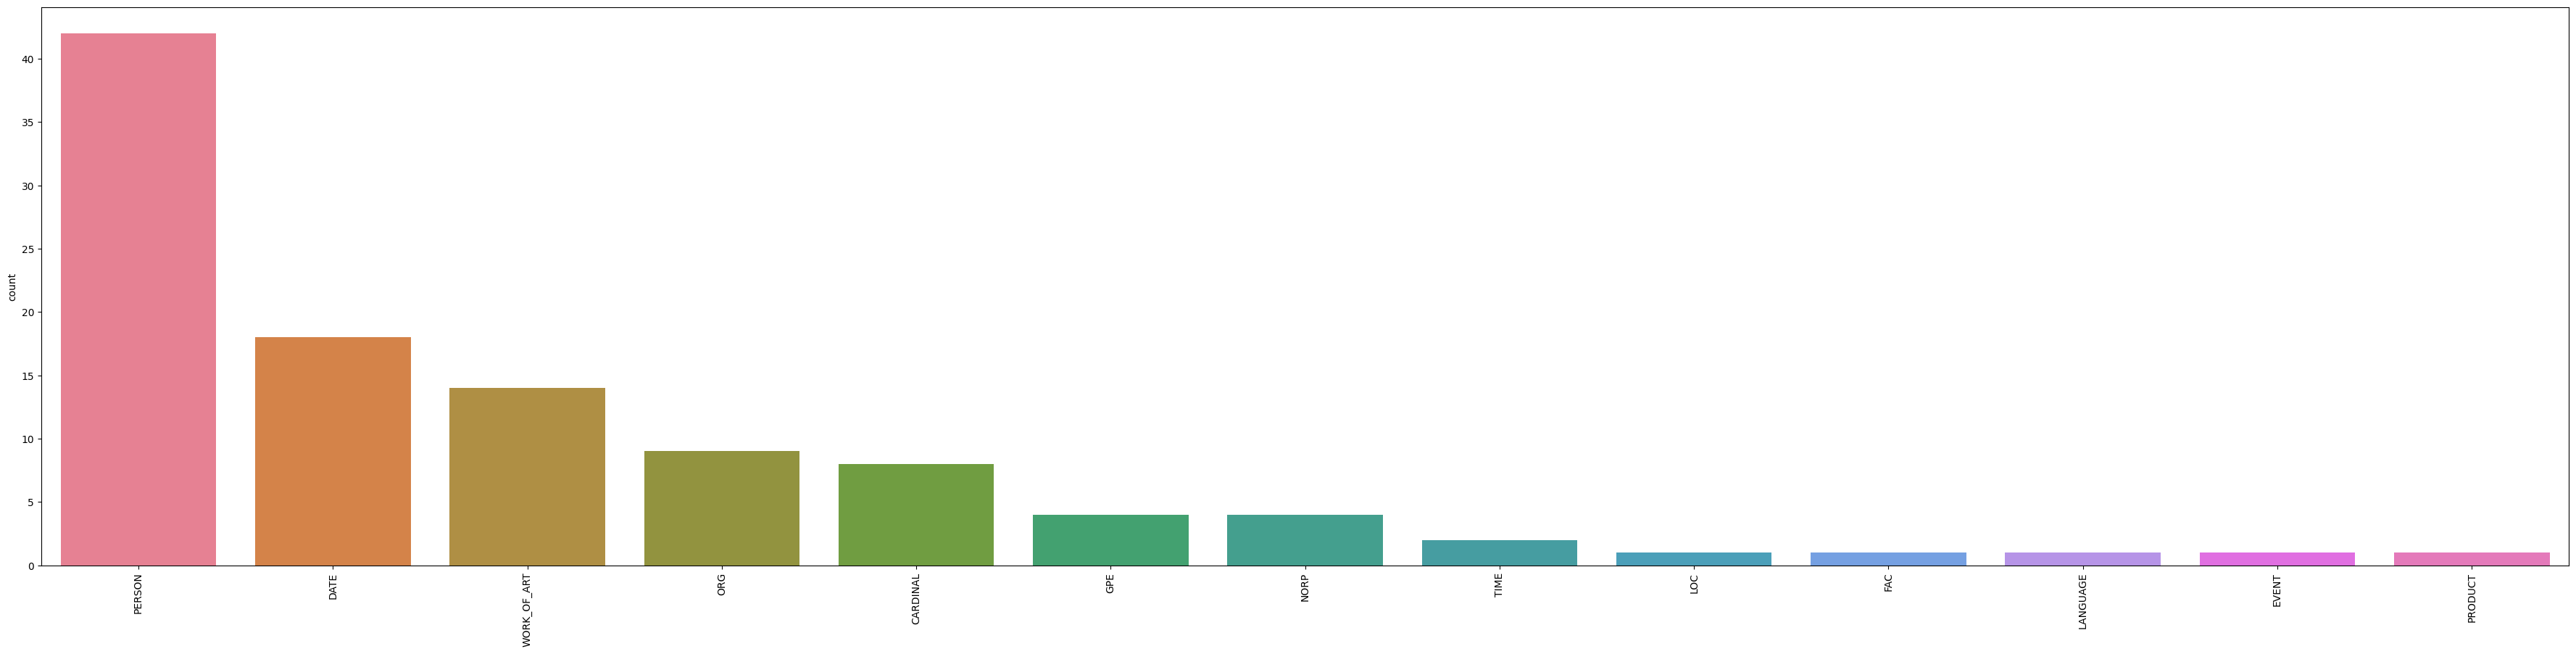

In [145]:
plt.figure(figsize=(45,10))
sns.countplot(x=labels, order=pd.Series(labels).value_counts().index, palette='husl')
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=90)
plt.show()

# BREAK

# NLP Part II

# 1. Word embedding

#### Word2Vec
- Developed by [Mikolov et al., 2013](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
- Represent the meaning of the words as a vector
    - Vector: numeric array
    - Output of a neural network model that predicts the next word
- Surprisingly, many different semantic informations can be represented from word vectors of ```Word2Vec```
- (More explanation in here: https://www.tensorflow.org/tutorials/representation/word2vec)

You will also need to download a pretrained language model: https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz

In [146]:
import gensim

Change the filepath in the next cell to correspond to the location of the pretrained model file you downloaded above.

In [150]:
w2v_mod = gensim.models.KeyedVectors.load_word2vec_format("/Users/an/Documents/Umich/SI 618/SI_618_WN_24_Files/inclass/GoogleNews-vectors-negative300-SLIM.bin.gz", binary=True)


There are several pretrained models that you can access.  See
https://github.com/RaRe-Technologies/gensim-data/blob/master/list.json for a list of available models.

In [151]:
import gensim.downloader as api
# Google News is about 1.6GB, which you can download on your own
w2v_mod = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


## 1-1. Calculating similarity between words

- Q: What's similarity between *school* and *student*?

- the word vector for *school* looks like this:

In [152]:
w2v_mod['school']

array([ 9.13085938e-02,  2.81982422e-02,  3.68652344e-02,  2.18750000e-01,
        9.76562500e-02, -6.59179688e-02,  1.56250000e-01, -4.68750000e-02,
       -4.66918945e-03, -9.08203125e-02,  2.49023438e-01,  4.56542969e-02,
        6.64062500e-02, -9.86328125e-02, -1.05957031e-01,  1.06445312e-01,
       -2.00195312e-01,  1.40991211e-02,  1.36718750e-01, -8.78906250e-02,
        2.05078125e-01,  1.70898438e-01,  1.16577148e-02,  1.71875000e-01,
        4.85229492e-03, -3.49609375e-01,  2.27355957e-03,  1.84570312e-01,
        1.19628906e-01, -2.51464844e-02,  1.02050781e-01, -1.06933594e-01,
        4.00390625e-02,  7.50732422e-03, -1.63085938e-01, -1.49414062e-01,
        2.28515625e-01, -5.02929688e-02,  4.63867188e-02,  1.25000000e-01,
        1.30615234e-02,  1.27929688e-01,  1.10351562e-01, -5.05371094e-02,
        3.44238281e-02,  1.44531250e-01,  1.71875000e-01, -2.78320312e-02,
       -1.10839844e-01,  2.29492188e-01, -1.17187500e-01, -1.22070312e-01,
       -3.55529785e-03, -

In [153]:
len(w2v_mod['school'])

300

- and the word vector for *student* looks like this:

In [154]:
w2v_mod['student']

array([ 0.03686523,  0.0201416 ,  0.22167969,  0.15527344,  0.17871094,
        0.03149414,  0.31445312, -0.03369141,  0.15429688, -0.375     ,
        0.05102539, -0.13183594, -0.11962891, -0.13867188, -0.02026367,
        0.01318359, -0.06738281, -0.06591797, -0.02502441, -0.140625  ,
        0.02160645,  0.17382812, -0.00177765, -0.09179688, -0.09765625,
       -0.4921875 , -0.13671875, -0.00570679,  0.16992188,  0.10107422,
        0.09423828, -0.10986328, -0.08496094,  0.05419922, -0.06542969,
       -0.0168457 ,  0.11230469,  0.13964844, -0.08300781,  0.22265625,
       -0.23828125,  0.11767578, -0.04614258,  0.0859375 ,  0.17089844,
       -0.06884766,  0.04003906, -0.10351562,  0.15917969,  0.04956055,
       -0.10888672, -0.15039062,  0.01507568, -0.05419922,  0.25      ,
       -0.09521484, -0.11816406,  0.11132812,  0.20507812, -0.10009766,
        0.0168457 , -0.09521484, -0.00308228, -0.01348877,  0.09277344,
       -0.08447266,  0.08496094, -0.05541992,  0.15820312,  0.10

- the similarity between two word vectors is:

In [ ]:
w2v_mod.similarity('school', 'student')

0.60556275

### <font color='magenta'> Q4: Find a word that is more similar to school using this model </font>

In [155]:
w2v_mod.similarity('school', 'teacher') # more similar

0.63824064

In [158]:
w2v_mod.similarity('school', 'campus') # less similar

0.42797357

### <font color='magenta'>Q5 Find two words that have a cosine similarity less than .1 </font>
- How would you interprete the results?

In [159]:
w2v_mod.similarity('school', 'bye') 

0.08497014

The school has less relation with bye.

### <font color='magenta'> Q6 Try some other words. Any other interesting findings? </font>
- Give 2 more examples.
- How would you interprete the results?

In [191]:
w2v_mod.similarity('school', 'hello') # less similar

0.10209758

In [190]:
w2v_mod.similarity('school', 'brother') # less similar

0.14564821

(type in your response here)

## 1-2. Analogy from word vectors

<img src="https://www.tensorflow.org/images/linear-relationships.png" width="800">

#### Can we approximate the relationship between words by doing - and + operations?

- $ Spain - Germany \approx x -  Berlin $
- $\rightarrow Spain - Germany + Berlin \approx ?$


In [164]:
w2v_mod.most_similar(positive=['Spain', 'Berlin'], negative=['Germany'])

[('Madrid', 0.7173481583595276),
 ('Barcelona', 0.5742595791816711),
 ('Malaga', 0.5547428131103516),
 ('San_Sebastián', 0.5468496084213257),
 ('Bilbao', 0.5404422283172607),
 ('Paseo_del_Prado', 0.5403422713279724),
 ('Gijón', 0.5378726720809937),
 ('Lisbon', 0.5366038680076599),
 ('Seville', 0.5312415361404419),
 ('Buenos_Aires', 0.5305452346801758)]

In [165]:
w2v_mod.most_similar(positive=['Italy', 'Berlin'], negative=['Germany'])

[('Rome', 0.7297912836074829),
 ('Milan', 0.6385141015052795),
 ('Italian', 0.6272469758987427),
 ('Bologna', 0.5835853219032288),
 ('Sicily', 0.5803887844085693),
 ('Palermo_Sicily', 0.5634143352508545),
 ('Giorgio', 0.5627465844154358),
 ('Palermo', 0.5560237169265747),
 ('Villa_Giulia', 0.5463685393333435),
 ('Milano', 0.5429990887641907)]

### <font color='magenta'> Q8 Any other interesting examples? </font>
- Give 3 more examples *not* using capital cities.
- How would you interprete the results?

In [193]:
w2v_mod.most_similar(positive=['Germany', 'England'], negative=['Austria'])

[('stock_symbol_BNK', 0.604256808757782),
 ('ticker_symbol_BNK', 0.5789235830307007),
 ('Britain', 0.5499847531318665),
 ('Wales', 0.5129137635231018),
 ('Lakenheath_Airfield', 0.5113884806632996),
 ('LSO_St_Lukes', 0.49802732467651367),
 ('Pluto_Platters', 0.48979297280311584),
 ('Graner_contradicted', 0.4876289665699005),
 ('Engalnd', 0.4874902069568634),
 ('FOOTBALL_::', 0.48316094279289246)]

In [194]:
w2v_mod.most_similar(positive=['Germany', 'England'], negative=['China'])

[('stock_symbol_BNK', 0.5638960599899292),
 ('ticker_symbol_BNK', 0.5462726354598999),
 ('Austria', 0.54134202003479),
 ('coach_Joachim_Löw', 0.515227735042572),
 ('Lakenheath_Airfield', 0.5149509310722351),
 ('Bayern_Munich_Philipp_Lahm', 0.4921528697013855),
 ('Helmut_Haller', 0.48817625641822815),
 ('Uwe_Seeler', 0.48526933789253235),
 ('Cologne', 0.48449456691741943),
 ('striker_Thomas_Brdaric', 0.4824743866920471)]

In [195]:
w2v_mod.most_similar(positive=['Germany', 'England'], negative=['India'])

[('Austria', 0.5574183464050293),
 ('stock_symbol_BNK', 0.5381453037261963),
 ('ticker_symbol_BNK', 0.5225269198417664),
 ('Germnay', 0.5133788585662842),
 ('coach_Joachim_Löw', 0.511593222618103),
 ('Cologne', 0.5105977058410645),
 ('defender_Christian_Woerns', 0.5013854503631592),
 ('Hamburg', 0.4954656660556793),
 ('striker_Thomas_Brdaric', 0.4953078627586365),
 ('Bayern_Munich_Philipp_Lahm', 0.4939272403717041)]

## 1-3. Constructing interpretable semantic scales 

- So far, we saw that word vectors effectively carries (although not perfect) the semantic information.
- Can we design something more interpretable results from using the semantic space?

- Let's re-try with real datapoints in [here](https://projector.tensorflow.org): *politics* words in a *bad-good* PCA space

In [166]:
from scipy import spatial
 
def cosine_similarity(x, y):
    return(1 - spatial.distance.cosine(x, y))

- Can we regenerate this results with our embedding model?

### Let's plot words in the 2D space
- Using Bad & Good axes
- Calculate cosine similarity between an evaluating word (violence, discussion, and issues) with each scale's end (bad, and good)

In [167]:
pol_words_sim_2d = pd.DataFrame([[cosine_similarity(w2v_mod['violence'], w2v_mod['good']), cosine_similarity(w2v_mod['violence'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['discussion'], w2v_mod['good']), cosine_similarity(w2v_mod['discussion'], w2v_mod['bad'])],
                                 [cosine_similarity(w2v_mod['issues'], w2v_mod['good']), cosine_similarity(w2v_mod['issues'], w2v_mod['bad'])]],
                                index=['violence', 'discussion', 'issues'], columns=['good', 'bad'])

In [168]:
pol_words_sim_2d

,good,bad
violence,-0.016942,0.091223
discussion,0.045935,-0.007224
issues,0.139897,0.118816


- If we plot this:

<Axes: xlabel='good', ylabel='bad'>

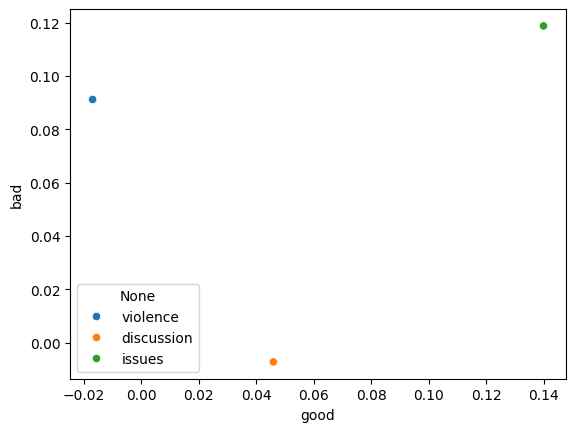

In [169]:
sns.scatterplot(x='good', y='bad', data=pol_words_sim_2d, hue=pol_words_sim_2d.index)

- violence: less good, more bad
- discussion: less bad, more good
- issues: both bad and good

### Can we do this in an 1D scale?
(bad) --------------------?---- (good)

- First, let's create the vector for *bad-good* scale

In [170]:
scale_bad_good = w2v_mod['good'] - w2v_mod['bad']

In [172]:
cosine_similarity(w2v_mod['good'], w2v_mod['bad'])

0.7190051674842834

In [173]:
len(scale_bad_good)

300

- Calculate the cosine similarity score of the word *violence* in the *bad-good* scale 
    - $sim(V(violence), V(bad) - V(good))$

In [174]:
violence_score = cosine_similarity(w2v_mod['violence'], scale_bad_good)
violence_score

-0.14850080013275146

In [175]:
discussion_score = cosine_similarity(w2v_mod['discussion'], scale_bad_good)
discussion_score

0.06724762171506882

# 2. Sentiment Analysis with NLTK

"The Natural Language Toolkit (NLTK) is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language."
for more information see: https://www.nltk.org/

We are going to use NLTK and Spacy to determine if text expresses positive sentiment, negative sentiment, or if it's neutral.

In [176]:
# adapted from https://github.com/Jcharis/Natural-Language-Processing-Tutorials/blob/master/NLP%20with%20SpaCy-%20Adding%20Extensions%20Attributes%20in%20SpaCy(How%20to%20use%20sentiment%20analysis%20in%20SpaCy).ipynb
import nltk

"VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media."

for more see: https://github.com/cjhutto/vaderSentiment

In [177]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/an/nltk_data...


True

We are going to extend the spacy functionality with the SentimentIntensityAnalyzer function from NLTK.

In [178]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(docx):
    return sent_analyzer.polarity_scores(docx.text)

In [179]:
from spacy.tokens import Doc
Doc.set_extension("sentimenter",getter=sentiment_scores)

In [180]:
nlp("This introduction was great but the conclusions were terrible")._.sentimenter

{'neg': 0.303, 'neu': 0.511, 'pos': 0.186, 'compound': -0.3818}

Let's apply this sentiment analysis to product reviews on Amazon

In [181]:
r = pd.read_csv('https://raw.githubusercontent.com/umsi-data-science/data/main/small_reviews.csv',index_col=0)
#random sample of original dataset at https://www.kaggle.com/snap/amazon-fine-food-reviews

In [182]:
r.head()

,Score,Summary,Text
244509,4,Love Happy Tot,I just love the happy tot baby food line. It s...
87295,4,Feelin Hot Hot Hot,Curry has become one of my favorite foods over...
377094,5,Wow. Very Maple-y,"Just tried this for the first time, and I'm qu..."
44261,4,"Good dark, rich coffee for breakfast time",After trying lots of different blends in K-Cup...
398439,5,Fantastic coffee!,"Exceptional coffee all around - rich, full, wi..."


We'll use the apply function to transform text with spacy's nlp function.

In [183]:
r['compound_sentiment_rating'] = r['Text'].apply(lambda x: nlp(x)._.sentimenter['compound'])

In [184]:
r[['Score','compound_sentiment_rating','Text']].head(10)

,Score,compound_sentiment_rating,Text
244509,4,0.9558,I just love the happy tot baby food line. It s...
87295,4,0.9742,Curry has become one of my favorite foods over...
377094,5,0.9383,"Just tried this for the first time, and I'm qu..."
44261,4,0.8476,After trying lots of different blends in K-Cup...
398439,5,0.5983,"Exceptional coffee all around - rich, full, wi..."
269511,5,0.9652,These are a delicious vegan alternative to reg...
89042,1,-0.6048,I have never cared for sweetened cereal as I w...
225284,3,0.8029,I've been looking for dried organic mango that...
92943,3,-0.1971,"This meal-in-a-box was alright, but not amazin..."
22875,4,0.2732,This product works well with most kinds of mea...


In [186]:
r.iloc[6].Text

"I have never cared for sweetened cereal as I was not raised on it. When I found Purely O's a few years ago I was happy to have found a cereal that did not contain sugar or corn products which I need to avoid because of a corn allergy.  I had intended to buy another box today. I took the time to read the label to make sure that nothing had changed. I could not believe that the ingredient list now lists CORN!  I am so angry!  Purely O's were my go-to breakfast when I needed a something quick or was in the mood for cereal.  There is nothing that this  company makes that I can now eat.  When will these people learn humans aren't pigs! Everything in a supermarket should not contain corn!  If I had wanted corny oat cereal I would have bought Cheerios."

<Axes: xlabel='Score', ylabel='compound_sentiment_rating'>

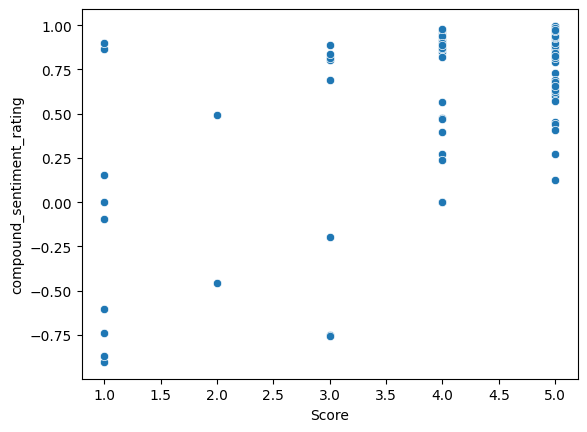

In [187]:
sns.scatterplot(x='Score',y='compound_sentiment_rating',data=r)

In [188]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [189]:
model0 = smf.ols("compound_sentiment_rating ~ Score ", data=r)
model0.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     compound_sentiment_rating   R-squared:                       0.430
Model:                                   OLS   Adj. R-squared:                  0.424
Method:                        Least Squares   F-statistic:                     73.92
Date:                       Wed, 21 Feb 2024   Prob (F-statistic):           1.32e-13
Time:                               14:32:16   Log-Likelihood:                -38.820
No. Observations:                        100   AIC:                             81.64
Df Residuals:                             98   BIC:                             86.85
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3960      0.128     -3.094      0.003      -0.650      -0.142
Score          0.2508      0.029      8.598      0.000       0.193       0.309
==============================================================================
Omnibus:                       11.481   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.888
Skew:                          -0.548   Prob(JB):                     0.000355
Kurtosis:                       4.617   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""